# Table of Contents:



## Load Data

In [1]:
pwd # current directory

'C:\\Users\\17812\\Documents\\GitHub\\healthcare\\dev\\kailun'

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
filename= r'diabetic_data.csv'
train_data = pd.read_csv(filename)

#### Requirments for extraction of initial dataset from database:

1) Hospital admission 

2) Any kind of diabetes diagnosis

3) Length of stay > 1 day, < 14 days

4) Lab tests were performed in hospital 

5) Medications were given in hospital

#### Let's check that the data is loaded correctly 

In [5]:
train_data.sample(32)

encounter_id  patient_nbr             race  gender       age  \
70662      203146920     50424750        Caucasian  Female   [50-60)   
34878      108672666     12355065        Caucasian    Male   [50-60)   
78640      240422148    106739046        Caucasian    Male   [60-70)   
70199      200980344     88898445        Caucasian  Female   [70-80)   
71089      205402374     23058477        Caucasian  Female   [30-40)   
76450      230795646     80580213        Caucasian    Male   [70-80)   
13782       54383862     18920943  AfricanAmerican    Male   [30-40)   
100318     424343852     86411430        Caucasian  Female   [80-90)   
65043      181141572     71595486        Caucasian  Female   [50-60)   
31512      101093220     91503747        Caucasian  Female   [40-50)   
2807        17922678      3184335        Caucasian  Female   [40-50)   
94052      343664384    131683244        Caucasian    Male   [70-80)   
86203      273931338     45403434  AfricanAmerican  Female   [60-70)   
83917      263535126     41332383        Caucasian    Male   [80-90)   
12998       52247418       684819        Caucasian  Female   [50-60)   
83006      259133460     58249314        Caucasian    Male   [40-50)   
26862       88207416     24225093        Caucasian  Female   [70-80)   
57390      163702890     98024688  AfricanAmerican  Female  [90-100)   
78456      239643894     88521714        Caucasian  Female   [70-80)   
79202      242844252     88785891        Caucasian  Female   [20-30)   
52319      154996674    103778271        Caucasian    Male   [70-80)   
73317      216414984     92666691        Caucasian  Female   [60-70)   
21812       75689178      4889988        Caucasian  Female   [70-80)   
2842        18174696     42252210        Caucasian    Male   [40-50)   
24454       82804872      3570723        Caucasian  Female   [50-60)   
38421      119465448     53168247        Caucasian  Female   [60-70)   
22526       77586630     21915198        Caucasian  Female   [70-80)   
28538       93539520     17098587        Caucasian  Female   [40-50)   
71106      205457676     43966593        Caucasian  Female   [50-60)   
39801      123780300     36052290            Other    Male   [40-50)   
43015      132723918    106748388        Caucasian    Male   [80-90)   
53215      156443142     59413167        Caucasian    Male   [70-80)   

           weight  admission_type_id  discharge_disposition_id  \
70662           ?                  2                         1   
34878           ?                  1                         2   
78640           ?                  3                         3   
70199           ?                  3                         1   
71089     [50-75)                  1                         1   
76450           ?                  1                         1   
13782           ?                  1                         1   
100318          ?                  1                         1   
65043           ?                  1                         1   
31512   [100-125)                  1                         1   
2807            ?                  2                         1   
94052           ?                  3                         1   
86203           ?                  2                         3   
83917           ?                  3                         1   
12998           ?                  1                         1   
83006           ?                  1                         1   
26862           ?                  5                         1   
57390           ?                  2                         6   
78456           ?                  1                         1   
79202           ?                  2                         1   
52319           ?                  2                         2   
73317           ?                  2                         1   
21812           ?                  1                         1   
2842            ?                  2           

In [128]:
print(train_data.columns)
print(train_data.shape)  # There are 101766 rows and 50 columns 

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_yes'],
      dtype='object')
(101766, 51)


#### First let's check whether there are any null/ NA values, since machine learning models can't handle these 

In [8]:
#np.sum(train_data.isnull(), axis=0), use either code
train_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

#### There are no null values, but there are ? marks.  For example `weight` has too many "?" for it to be a meaningful feature and it has been dropped by the paper since there are 98569 cases out of 100k+. (Note here that the HITECH legislature does not require hospitals to capture this information)

In [42]:
train_data[train_data['weight']=='?'].shape[0]

98569

#### What are the columns that have "?"s?  

In [265]:
for col in train_data.columns:
    if train_data[col].dtype == object:
        if train_data[col][train_data[col] == '?'].count() != 0:
            #print(col, 'no rows with ?')
            print(col, train_data[col][train_data[col] == '?'].count())

race 2273
medical_specialty 49949
diag_2 358
diag_3 1423


In [255]:
train_data_2[train_data_2['medical_specialty']=='?'].shape[0]/ len(train_data_2)  

0.4812674314960177

#### Should we drop `payer_code` and `medical_specialty`? In the paper, `payer_code` is dropped, while `medical_specialty` is kept:

In [130]:
train_data = train_data.drop(['weight','payer_code'], axis = 1)

## Examine the predictor variable 

Need to feature engineer this feature into binary feature 

In [13]:
train_data['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Based on the value counts above, we observe three levels of readmitted status.  About 10% of patients are readmitted within 30 days after hospital encounter.  Let's feature engineer the variable 'readmitted' to be strictly categorical 0 or 1.  

In [14]:
train_data['readmitted_yes'] = pd.Series(len(train_data['readmitted']), index=train_data.index)
train_data['readmitted_yes']= 0
train_data.loc[train_data['readmitted']== '<30','readmitted_yes'] = 1

In [15]:
def logit_fun(col_name):
    prob= len(train_data.loc[train_data[col_name]==1])/len(train_data[col_name])
    logit=np.log(prob/(1-prob))
    return logit

In [16]:
logit_fun('readmitted_yes')

-2.074509526055224

## Need to narrow down the encounters (rows): 

If our assumption is that there's a linear trend bet the readmission rate and features:

Based on the paper, the population in the paper is 69,984, so how to get there:

Based on the paper, have to remove multiple rows for same patient, leaving only independent observations.  What's being tracked here? How is patient_nbr generated? A patient has multiple encounters over the course of 10 years, from the value_counts(), we observe that the patient is not unique, but the encounter is.  We will keep the first encounter 

In [17]:
train_data['patient_nbr'].value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Length: 71518, dtype: int64

#### Note that for tree based models, let's try both with just the first encounter and all of the encounters 

In [18]:
# Could be commented out 
train_data_2 = train_data.drop_duplicates(subset= ['patient_nbr'], keep = 'first') 

In [19]:
train_data_2['readmitted'].value_counts()

NO     42985
>30    22240
<30     6293
Name: readmitted, dtype: int64

#### We can also remove patients who have discharge_id= 20, which means that the patient has died in the hospital  NEED TO CHECK WITH domain expert regarding discharge_disposition_id

#### Here we want to look at `diag_2` indexes for the rows that have '?' for `diag_1`: 

In [132]:
train_data_2.loc[list(set(train_data_2['diag_1'][train_data_2['diag_1'] == '?'].index))]['diag_2']

Series([], Name: diag_2, dtype: object)

In [137]:
train_data.loc[train_data['diag_1'] == '?']

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted, readmitted_yes]
Index: []

[0 rows x 49 columns]

In [226]:
drop_Idx = set(train_data_2[(train_data_2['diag_1'] == '?') & (train_data_2['diag_2'] == '?') & (train_data_2['diag_3'] == '?')].index)
drop_Idx = drop_Idx.union(set(train_data_2['diag_1'][train_data_2['diag_1'] == '?'].index))
drop_Idx = drop_Idx.union(set(train_data_2['race'][train_data_2['race'] == '?'].index))
drop_Idx = drop_Idx.union(set(train_data_2[train_data_2['discharge_disposition_id'] == 20].index))
drop_Idx = drop_Idx.union(set(train_data_2[train_data_2['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(train_data_2['gender'][train_data_2['gender'] == 'Unknown/Invalid'].index))
print(len(list(drop_Idx))) # the number of rows dropped 

1050


In [22]:
new_Idx = list(set(train_data_2.index) - set(drop_Idx))
train_data_2 = train_data_2.loc[new_Idx]

In [53]:
train_data_2.shape

(69558, 53)

## Interaction terms from the publication: 

Interaction terms from the paper and new interaction terms to implement 

In [201]:
# this includes medical_specialty
interaction_terms_paper= [('HbA1c', 'diag1_collapse'),('age_bin', 'medical_specialty'), ('race', 'discharge_yes'), 
                          ('discharge_yes', 'time_in_hospital'),('medical_specialty', 'discharge'), 
                          ('time_in_hospital', 'medical_specialty'), ('time_in_hospital', "diag1_collapse")]

In [63]:
interaction_terms_paper_mod= [('HbA1c', 'diag1_collapse'),('race', 'discharge_yes'), ('discharge_yes', 'time_in_hospital'),
                              ('time_in_hospital', "diag1_collapse")]

####  These are the single features that I will examine in more detail: it seems like A1Cresult and change are used here, but diabetesMed is not used in the initial logistic model.  Will need more investigation 

In [140]:
nom_var=['A1Cresult','change', 'diabetesMed', 'readmitted', 'readmitted_yes']

######################################BREAK##################################################

### A1Cresult is divided into 4 groups:  A1Cresult has to be feature engineered into `HbA1c` as an interactive variable

`None`is considered not measured: This is designated as the reference group per paper 

`>8 and No change` is considered `High_NoCh`

`>8 and Ch` is considered `High_Ch`

`Norm and >7` groups is considered `Norm` :  This is the normal group

#### First let's examine the value counts for A1Cresult

In [30]:
train_data_2['A1Cresult'].value_counts()

None    56958
>8       6065
Norm     3716
>7       2819
Name: A1Cresult, dtype: int64

In [31]:
# Let's also examine the A1Cresult with change
train_data_2[['encounter_id','A1Cresult', 'change']].head()

encounter_id A1Cresult change
0       2278392      None     No
1        149190      None     Ch
2         64410      None     No
3        500364      None     Ch
4         16680      None     Ch

In [32]:
train_data_2['HbA1c']=pd.Series(len(train_data_2['A1Cresult']), index=train_data_2)
train_data_2['HbA1c']= 'None'
train_data_2.loc[(train_data_2['A1Cresult']=='Norm') | (train_data_2['A1Cresult']=='>7'), 'HbA1c']= 'Norm'
train_data_2.loc[(train_data_2['A1Cresult']=='>8') & (train_data_2['change']=='No'), 'HbA1c']= 'High_NoCH'
train_data_2.loc[(train_data_2['A1Cresult']=='>8') & (train_data_2['change']== 'Ch'), 'HbA1c']= 'High_CH'

In [33]:
train_data_2[['A1Cresult', 'change', 'HbA1c']].sample(60)

A1Cresult change      HbA1c
589         None     No       None
84657       None     No       None
22275       None     Ch       None
95247       None     No       None
57590       None     No       None
86413       None     Ch       None
91636         >7     No       Norm
856         None     No       None
55173       None     No       None
74602       None     Ch       None
76206       None     No       None
11331       None     Ch       None
37528       None     Ch       None
73383         >8     Ch    High_CH
47828       None     No       None
9925        None     No       None
38211       None     No       None
7853        None     Ch       None
7071        None     No       None
23869       None     Ch       None
80819       None     No       None
76154       None     Ch       None
44087       None     No       None
69308       None     No       None
93204       None     No       None
81616       None     Ch       None
38526       None     No       None
21620       None     No       None
55205       None     Ch       None
70470       None     Ch       None
40611       None     No       None
5890        None     No       None
3292          >8     No  High_NoCH
19496       Norm     Ch       Norm
66397       None     No       None
91909       None     Ch       None
16196       None     No       None
38929       None     No       None
13221       None     No       None
30836       None     No       None
34658       None     Ch       None
20412       None     No       None
82636       None     Ch       None
69631       None     No       None
58796       None     Ch       None
18361       None     Ch       None
42797       None     Ch       None
28127       None     No       None
55658         >8     Ch    High_CH
11979       None     No       None
17499       None     No       None
44838       None     Ch       None
37358       None     Ch       None
22584         >8     Ch    High_CH
64306       None     No       None
74177       Norm     Ch       Norm
98957         >8     Ch    High_CH
43367       None     Ch       None
37365       None     Ch       None
101284      None     Ch       None

In [195]:
# designate as one
one_dum_tree = pd.get_dummies(train_data_2[['HbA1c']])
one=list(one_dum_tree.columns)
one_dum_linear= one_dum_tree.drop('HbA1c_None', axis=1)
one_l=list(one_dum_linear.columns)

### Diagnosis is divided into groups referenced in the paper, the name of the feature is `diag_1`, but need to feature engineer `diag1_collapse`

`circulatory`: 1- 390 <= icd9 <= 459 or icd9 == 785

`respiratory`: 2- 460 <= icd9 <= 519 or icd9 == 786

`digestive`: 3- 520 <= icd9 <= 579 or icd9 == 787:

`diabetes`: 4- 250.xx

`injury`(this is also includes poisoning) : 5- 800<= icd9 <=999

`muscul`: 6- 710 <= icd9 <= 739

`genit`: 7- 580<= icd9 <= 629 or icd9 == 788

`neoplasms`: 8- 140<=icd9 <=239

`other`: 0- The catch all 

#### Let's first get the value counts and the `diag_1` 

In [34]:
print(train_data_2['diag_1'].value_counts())
print("total unique diagnosis categories are")
print(len(train_data_2['diag_1'].value_counts()))

414    5073
428    3881
786    2964
410    2814
486    2373
       ... 
837       1
848       1
381       1
649       1
V60       1
Name: diag_1, Length: 693, dtype: int64
total unique diagnosis categories are
693


In [35]:
print(train_data['diag_1'].str.contains('V').sum())
print(train_data['diag_1'].str.contains('E').sum())
print(train_data_2['diag_1'].str.contains('V').sum())
print(train_data_2['diag_1'].str.contains('E').sum())

1644
1
898
1


In [36]:
# this is for the original train_data dataframe
train_data.loc[(train_data['diag_1'].str.contains('V')) | (train_data['diag_1'].str.contains('E')), 'diag_1']= 0
train_data['diag_1'] = train_data['diag_1'].replace('?', -1)
train_data['diag_1'] = train_data['diag_1'].astype(float)

# this is for train_data_2
train_data_2.loc[(train_data_2['diag_1'].str.contains('V')) | (train_data_2['diag_1'].str.contains('E')), 'diag_1'] = 0
train_data_2['diag_1'] = train_data_2['diag_1'].astype(float)

print(train_data_2.loc[train_data_2['diag_1']==0].shape[0])  # this should add up to 899

In [73]:
# Creating an empty column for diag1_collapse
train_data_2['diag1_collapse'] = pd.Series(len(train_data_2['diag_1']), index=train_data_2.index)
# Initiate all the values as 0
train_data_2['diag1_collapse'] = 'other'

for index, row in train_data_2.iterrows():
    
    if (row['diag_1'] >= 390 and row['diag_1'] <= 359) | (np.floor(row['diag_1']) == 785):
        train_data_2.loc[index, 'diag1_collapse'] = 'circulatory'
        
    elif (row['diag_1'] >= 460 and row['diag_1'] <= 519) | (np.floor(row['diag_1']) == 786):
        train_data_2.loc[index, 'diag1_collapse'] = 'respiratory'
        
    elif (row['diag_1'] >= 520 and row['diag_1'] <= 579) | (np.floor(row['diag_1']) == 787):
        train_data_2.loc[index, 'diag1_collapse'] = 'digestive'
        
    elif (np.floor(row['diag_1']) == 250):
        train_data_2.loc[index, 'diag1_collapse'] = 'diabetes'
        
    elif (row['diag_1'] >= 800 and row['diag_1'] <= 999):
        train_data_2.loc[index, 'diag1_collapse'] = 'injury'
        
    elif (row['diag_1'] >= 710 and row['diag_1'] <= 739):
        train_data_2.loc[index, 'diag1_collapse'] = 'muscul'
        
    elif (row['diag_1'] >= 580 and row['diag_1'] <= 629) | (np.floor(row['diag_1']) == 788):
        train_data_2.loc[index, 'diag1_collapse'] = 'genit'
        
    elif (row['diag_1'] >= 140 and row['diag_1'] <= 239):
        train_data_2.loc[index, 'diag1_collapse'] = 'neoplasms'

In [74]:
train_data_2[['diag_1','diag1_collapse']].sample(50)

diag_1 diag1_collapse
37207    428.0          other
38596    722.0         muscul
46822    682.0          other
61203    275.0          other
55404    428.0          other
84465    250.8       diabetes
13845    799.0          other
96449    786.0    respiratory
13220    410.0          other
56457    590.0          genit
88800    618.0          genit
19692    965.0         injury
22762    410.0          other
67939    965.0         injury
62992    427.0          other
30648    414.0          other
7273     410.0          other
75739    569.0      digestive
19279    924.0         injury
51794    410.0          other
45462    715.0         muscul
101399   427.0          other
88109    560.0      digestive
91481    287.0          other
16031    295.0          other
46886    780.0          other
77534    482.0    respiratory
67751    250.8       diabetes
13701    414.0          other
89402    410.0          other
10057    786.0    respiratory
32631    882.0         injury
94375    276.0          other
89751    786.0    respiratory
87551    715.0         muscul
23319    786.0    respiratory
30920    486.0    respiratory
17847    715.0         muscul
27937    715.0         muscul
53430    528.0      digestive
55149    434.0          other
6144     410.0          other
28000    427.0          other
7603     434.0          other
45685    276.0          other
42455    198.0      neoplasms
27660    571.0      digestive
37268    276.0          other
95963    493.0    respiratory
78236    428.0          other

In [196]:
two_dum_tree = pd.get_dummies(train_data_2[['diag1_collapse']])
two=list(two_dum_tree.columns)
two_dum_linear=two_dum_tree.drop('diag1_collapse_diabetes', axis=1)
two_l=list(two_dum_linear.columns)

### Age is divided into 3 groups

`30_60` : this age group is designated as the reference group, which means that for linear models, drop this group after onehot encoding to prevent multicollinearity 

`<30`

`60_100`

In [56]:
train_data_2['age'].value_counts()

[70-80)     17720
[60-70)     15516
[50-60)     12135
[80-90)     11273
[40-50)      6679
[30-40)      2626
[90-100)     1840
[20-30)      1090
[10-20)       526
[0-10)        153
Name: age, dtype: int64

In [77]:
train_data_2['age_bin'] = pd.Series(len(train_data_2['age']), index=train_data_2.index)
train_data_2['age_bin']= '60+'
train_data_2.loc[(train_data_2['age']== '[0-10)')|(train_data_2['age']== '[10-20)')|(train_data_2['age']=='[20-30)'),'age_bin'] = '<30'
train_data_2.loc[(train_data_2['age']== '[30-40)')|(train_data_2['age']== '[40-50)')|(train_data_2['age']== '[50-60)'), 'age_bin'] ='30_60' 

In [198]:
three_dum_tree = pd.get_dummies(train_data_2[['age_bin']])
three=list(three_dum_tree.columns)
three_dum_linear = three_dum_tree.drop('age_bin_30_60', axis=1)
three_l=list(three_dum_linear.columns)

### Medical Specialty represents the speciality of the admitting physician 

There are six groups represented by the paper: however from the data, there are 71 different groups. Below are the top 20 groups. Here we categorize the groups as the following:

`Missing`: ? 

`Inter_Med`: InternalMedicine

`GP`: Family/GeneralPractice 

`ER_Trauma`: Emergency/Trauma

`Cardiology`: Cardiology

`Surgery`: Surgery-General, Surgery-Cardio/Thoracic, Surgery Neuro, Surgery Vascular

`Other`: Catch all of the rest 

In [113]:
train_data_2['medical_specialty'].value_counts().head(20)

?                                  33476
InternalMedicine                   10537
Family/GeneralPractice              4981
Emergency/Trauma                    4441
Cardiology                          4168
Surgery-General                     2167
Orthopedics                         1112
Orthopedics-Reconstructive          1004
Nephrology                           812
Radiologist                          811
Pulmonology                          626
Psychiatry                           591
ObstetricsandGynecology              575
Urology                              514
Surgery-Cardiovascular/Thoracic      477
Surgery-Neuro                        396
Gastroenterology                     395
Surgery-Vascular                     362
Oncology                             217
Pediatrics                           192
Name: medical_specialty, dtype: int64

In [162]:
def conv_ms_cat(ms_cat):
    if ms_cat == '?': 
        result = 'missing'
    elif ms_cat == 'InternalMedicine':
        result = 'inter_med'
    elif ms_cat== 'Family/GeneralPractice':
        result = 'gp'
    elif ms_cat ==  'Emergency/Trauma':
        result = 'ER_trauma'
    elif ms_cat ==  'Cardiology':
        result = 'cardiology'
    elif (ms_cat ==  'Surgery-General') | (ms_cat== 'Surgery-Cardiovascular/Thoracic')| (ms_cat== 'Surgery-Neuro')| (ms_cat=='Surgery-Vascular'):
        result = 'surgery'
    else:
        result = 'other'
    return result

In [163]:
train_data_2['medical_specialty_short']=train_data_2['medical_specialty'].apply(lambda x: conv_ms_cat(x))

In [197]:
four_dum_tree = pd.get_dummies(train_data_2[['medical_specialty_short']])
four=list(four_dum_tree.columns)
four_dum_linear= four_dum_tree.drop('medical_specialty_short_cardiology', axis=1)
four_l=list(four_dum_linear.columns)

### Race is divided into four groups in the paper, here we'll divide into 5 groups 

AfricanAmerican 

Asian 

Caucasian 

Hispanic

Other 

In [170]:
train_data_2['race'].value_counts()

Caucasian          53487
AfricanAmerican    12883
Hispanic            1515
Other               1177
Asian                496
Name: race, dtype: int64

In [199]:
five_dum_tree= pd.get_dummies(train_data_2[['race']])
five=five_dum_tree.columns
five_dum_linear=five_dum_tree.drop('race_AfricanAmerican', axis=1)
five_l=five_dum_linear.columns

### Discharge is divided into two groups: 

We observe that 1 is the most prevalent, and 1 indicates that the patient is discharged to home, and there are only two groups, either discharge to home or not 

`discharge_other`: is a binary variable 

In [174]:
train_data_2['discharge_disposition_id'].value_counts()

1     43028
3      8520
6      8109
18     2457
2      1480
22     1400
11     1050
5       878
25      762
4       500
7       398
23      256
13      242
14      215
28       89
8        72
15       40
24       25
9         9
17        8
10        6
19        6
27        3
16        3
12        2
Name: discharge_disposition_id, dtype: int64

In [167]:
train_data_2['discharge_other'] = pd.Series(len(train_data_2['discharge_disposition_id']), index=train_data_2.index)
train_data_2['discharge_other']= 0
train_data_2.loc[train_data_2['discharge_disposition_id']!= 1 ,'discharge_other'] = 1

In [169]:
#check with a comparison between discharge_disposition_id and discharge_other, make sure they match 
train_data_2[['discharge_disposition_id', 'discharge_other']].sample(50)

discharge_disposition_id  discharge_other
39834                          1                0
83860                          1                0
18740                          1                0
42464                          1                0
66179                          1                0
90678                          1                0
65004                          1                0
86694                          1                0
42193                          1                0
86120                          1                0
74572                          1                0
15922                          1                0
50896                          6                1
37775                          1                0
40956                          6                1
75807                          1                0
32065                          1                0
72770                          7                1
77782                          1                0
65617                          1                0
2089                           1                0
58332                         13                1
77929                          1                0
27651                          3                1
20828                          6                1
28458                          2                1
81731                          3                1
4031                           1                0
44451                          1                0
51291                          1                0
92211                          1                0
91502                          7                1
24322                          1                0
7769                           1                0
72147                          3                1
38130                          1                0
100990                         6                1
86457                          6                1
72735                          3                1
45999                          3                1
12013                          1                0
96835                          1                0
29551                          1                0
21896                          1                0
42007                          3                1
36433                          1                0
90844                          6                1
30705                          1                0
8158                           1                0
21711                          1                0

In [200]:
six_dum_tree= train_data_2[['discharge_other']]
six= six_dum_tree.columns
six_dum_linear=six_dum_tree
six_l= six_dum_tree.columns

### Admission Source ID is divided into three groups in the paper

But in the paper, the significant coefficient is on the "other" subcategory, so here we further divide the "other" group into 

In [228]:
idmapping = pd.read_csv('admission_source_id.csv')

In [229]:
idmapping

admission_source_id                                        description
0                     1                                 Physician Referral
1                     2                                    Clinic Referral
2                     3                                       HMO Referral
3                     4                           Transfer from a hospital
4                     5     Transfer from a Skilled Nursing Facility (SNF)
5                     6         Transfer from another health care facility
6                     7                                     Emergency Room
7                     8                              Court/Law Enforcement
8                     9                                      Not Available
9                    10              Transfer from critial access hospital
10                   11                                    Normal Delivery
11                   12                                 Premature Delivery
12                   13                                          Sick Baby
13                   14                                   Extramural Birth
14                   15                                      Not Available
15                   17                                                NaN
16                   18           Transfer From Another Home Health Agency
17                   19             Readmission to Same Home Health Agency
18                   20                                         Not Mapped
19                   21                                    Unknown/Invalid
20                   22   Transfer from hospital inpt/same fac reslt in...
21                   23                          Born inside this hospital
22                   24                         Born outside this hospital
23                   25            Transfer from Ambulatory Surgery Center
24                   26                              Transfer from Hospice

In [238]:
train_data_2.loc[train_data_2['admission_source_id']==19]

encounter_id  patient_nbr       race  gender      age weight  \
0            2278392      8222157  Caucasian  Female   [0-10)      ?   
23            183930    107400762  Caucasian  Female  [80-90)      ?   
27            248916    115196778  Caucasian  Female  [50-60)      ?   
42            421194     96435585  Caucasian  Female  [70-80)      ?   
73            927786     60679647  Caucasian  Female  [70-80)      ?   
...              ...          ...        ...     ...      ...    ...   
101740     443778398    134647673  Caucasian    Male  [40-50)      ?   
101745     443797076    183766055  Caucasian    Male  [50-60)      ?   
101749     443816024    106392411  Caucasian  Female  [70-80)      ?   
101751     443835140    175326800  Caucasian    Male  [70-80)      ?   
101752     443835512    139605341      Other  Female  [40-50)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
23                      2                         6                    1   
27                      1                         1                    1   
42                      2                         1                    1   
73                      3                         1                    1   
...                   ...                       ...                  ...   
101740                  3                         1                    1   
101745                  2                         1                    1   
101749                  3                         6                    1   
101751                  3                         6                    1   
101752                  3                         1                    1   

        time_in_hospital  ... readmitted readmitted_yes    HbA1c  \
0                      1  ...         NO              0     None   
23                    11  ...        >30              0     None   
27                     2  ...        >30              0     None   
42                    13  ...        >30              0     None   
73                    14  ...         NO              0     None   
...                  ...  ...        ...            ...      ...   
101740                 1  ...         NO              0     None   
101745                 3  ...         NO              0  High_CH   
101749                 3  ...         NO              0     Norm   
101751                13  ...         NO              0     Norm   
101752                 3  ...         NO              0     None   

        diag1_collapse  age_bin  discharge_yes  admission_source_collapse  \
0             diabetes      <30              0                   phys_ref   
23               other      60+              0                   phys_ref   
27              injury    30_60              1                   phys_ref   
42               other      60+              1                   phys_ref   
73           neoplasms      60+              1                   phys_ref   
...                ...      ...            ...                        ...   
101740           other    30_60              1                   phys_ref   
101745           other    30_60              1                   phys_ref   
101749          muscul      60+              0                   phys_ref   
101751           other      60+              0                   phys_ref   
101752           other    30_60              1                   phys_ref   

        diag1_collapse_circulatory_age_bin_30_60  medical_specialty_short  \
0                                              0                    other   
23                                             0                  missing   
27                                             0                  surgery   
42                                             0                  missing   
73                                             0                  surgery   
...                       

In [234]:
idmapping.loc[idmapping['description'].str.contains(r'Transfer', na=False)] # Note that here that admission_type_id is string instead of int

admission_source_id                                        description
3                     4                           Transfer from a hospital
4                     5     Transfer from a Skilled Nursing Facility (SNF)
5                     6         Transfer from another health care facility
9                    10              Transfer from critial access hospital
16                   18           Transfer From Another Home Health Agency
20                   22   Transfer from hospital inpt/same fac reslt in...
23                   25            Transfer from Ambulatory Surgery Center
24                   26                              Transfer from Hospice

In [239]:
# Convert admission source ID to category groups
def conv_adms_id(sid):
    try: 
        if  (sid == 1) | (sid ==2) | (sid==3): 
            result = 'referral'
        elif  sid == 7:
            result = 'emergency'
        elif (sid == 4) | (sid==5)|(sid==6)|(sid==10)| (sid==18)| (sid==22)| (sid==25)| (sid==26) :
            result = 'transfer'
        else:
            result = 'other'
        return result
    except ValueError:
        print('Source ID must be integer!')

In [240]:
train_data_2['admission_source_collapse']=train_data_2['admission_source_id'].apply(lambda x: conv_adms_id(x))

In [242]:
eight_dum_tree= pd.get_dummies(train_data_2[['admission_source_collapse']])
eight_dum_linear= eight_dum_tree.drop('admission_source_collapse_emergency', axis=1)

## Putting together the training_data set 

In [243]:
all_dum_linear= pd.concat([train_data_2[['encounter_id']],one_dum_linear, two_dum_linear, three_dum_linear, four_dum_linear, 
                           five_dum_linear,six_dum_linear, eight_dum_linear], axis=1, sort=False)

all_dum_tree= pd.concat([train_data_2[['encounter_id']], one_dum_tree, two_dum_tree, three_dum_tree, four_dum_tree, 
                         five_dum_tree, six_dum_tree, eight_dum_tree], axis=1, sort=False)

In [245]:
all_dum_linear.columns

Index(['encounter_id', 'HbA1c_High_CH', 'HbA1c_High_NoCH', 'HbA1c_Norm',
       'diag1_collapse_circulatory', 'diag1_collapse_digestive',
       'diag1_collapse_genit', 'diag1_collapse_injury',
       'diag1_collapse_muscul', 'diag1_collapse_neoplasms',
       'diag1_collapse_other', 'diag1_collapse_respiratory', 'age_bin_60+',
       'age_bin_<30', 'medical_specialty_short_ER_trauma',
       'medical_specialty_short_gp', 'medical_specialty_short_inter_med',
       'medical_specialty_short_missing', 'medical_specialty_short_other',
       'medical_specialty_short_surgery', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'discharge_other',
       'admission_source_collapse_other', 'admission_source_collapse_referral',
       'admission_source_collapse_transfer'],
      dtype='object')

In [250]:
all_dum_tree.columns

Index(['encounter_id', 'HbA1c_High_CH', 'HbA1c_High_NoCH', 'HbA1c_None',
       'HbA1c_Norm', 'diag1_collapse_circulatory', 'diag1_collapse_diabetes',
       'diag1_collapse_digestive', 'diag1_collapse_genit',
       'diag1_collapse_injury', 'diag1_collapse_muscul',
       'diag1_collapse_neoplasms', 'diag1_collapse_other',
       'diag1_collapse_respiratory', 'age_bin_30_60', 'age_bin_60+',
       'age_bin_<30', 'medical_specialty_short_ER_trauma',
       'medical_specialty_short_cardiology', 'medical_specialty_short_gp',
       'medical_specialty_short_inter_med', 'medical_specialty_short_missing',
       'medical_specialty_short_other', 'medical_specialty_short_surgery',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'discharge_other', 'admission_source_collapse_emergency',
       'admission_source_collapse_other', 'admission_source_collapse_referral',
       'admission_source_collapse_transfer'],
      dtype='object')

In [247]:
import itertools
column1=['one_l', 'three_l', 'two', 'five_l', 'four_l']
column2=['two_l', 'four_l', 'six', 'six', 'six']

#for col1, col2 in zip(column1, column2):
for r in itertools.product(one_l, two_l):
    all_dum_linear[r[0]+'_'+ r[1]]= one_dum_linear[r[0]]*two_dum_linear[r[1]]
    
for r in itertools.product(three_l, four_l):
    all_dum_linear[r[0]+'_'+ r[1]]= three_dum_linear[r[0]]*four_dum_linear[r[1]]
    
for r in itertools.product(two, six):
    all_dum_linear[r[0]+'_'+ r[1]]= two_dum_tree[r[0]]*six_dum_linear[r[1]]
    
for r in itertools.product(five_l, six):
    all_dum_linear[r[0]+'_'+ r[1]]= five_dum_linear[r[0]]*six_dum_linear[r[1]]
    
for r in itertools.product(four_l, six):
    all_dum_linear[r[0]+'_'+ r[1]]= four_dum_linear[r[0]]*six_dum_linear[r[1]]

In [248]:
all_dum_linear.to_csv('interaction_feat_kc.csv',index=True)

In [249]:
all_dum_linear.columns

Index(['encounter_id', 'HbA1c_High_CH', 'HbA1c_High_NoCH', 'HbA1c_Norm',
       'diag1_collapse_circulatory', 'diag1_collapse_digestive',
       'diag1_collapse_genit', 'diag1_collapse_injury',
       'diag1_collapse_muscul', 'diag1_collapse_neoplasms',
       'diag1_collapse_other', 'diag1_collapse_respiratory', 'age_bin_60+',
       'age_bin_<30', 'medical_specialty_short_ER_trauma',
       'medical_specialty_short_gp', 'medical_specialty_short_inter_med',
       'medical_specialty_short_missing', 'medical_specialty_short_other',
       'medical_specialty_short_surgery', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'discharge_other',
       'admission_source_collapse_other', 'admission_source_collapse_referral',
       'admission_source_collapse_transfer',
       'HbA1c_High_CH_diag1_collapse_circulatory',
       'HbA1c_High_CH_diag1_collapse_digestive',
       'HbA1c_High_CH_diag1_collapse_genit',
       'HbA1c_High_CH_diag1_collapse_injury',
       'HbA1c_H

In [117]:
interaction_terms_additional = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital'),
('num_medications','numchange')]

## Visualizations Variable counts for readmitted_yes vs readmitted_no 

<Figure size 1080x4320 with 0 Axes>

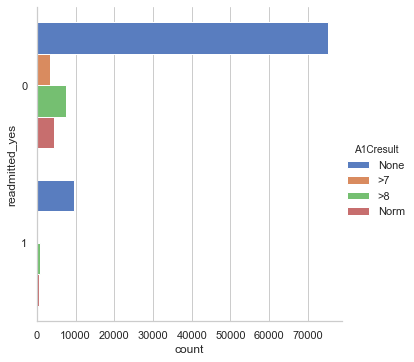

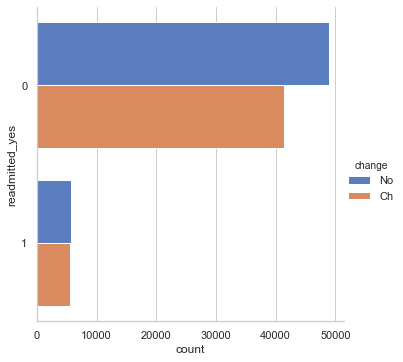

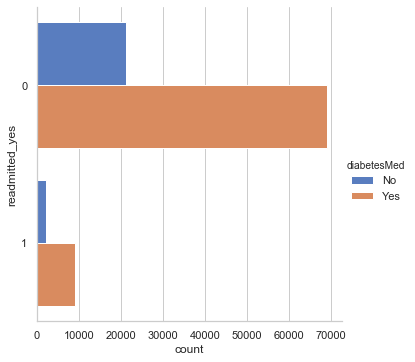

In [78]:
plt.figure(figsize=(15, 60))
for idx, col in enumerate(nom_var[0:3]):
    sns.catplot(y="readmitted_yes", hue=nom_var[idx], kind= "count", palette="muted", data=train_data_nom_var)

## Here we want to examine the mean probability of readmission among the groups and subgroups 

<Figure size 1152x5400 with 0 Axes>

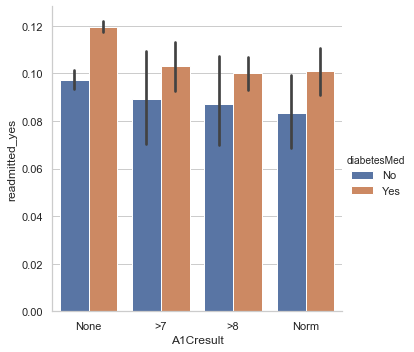

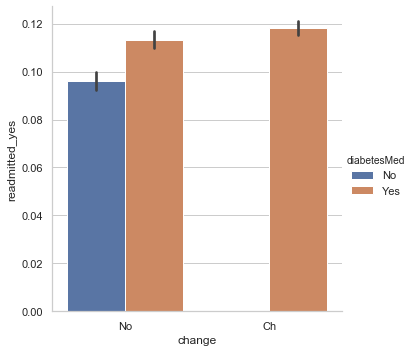

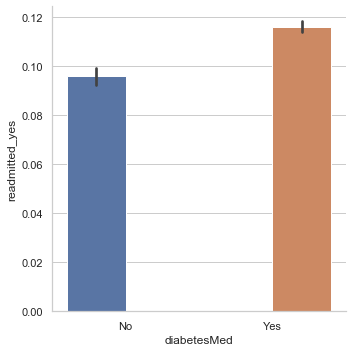

In [11]:
plt.figure(figsize=(16, 75))
for idx, col in enumerate(nom_var[0:3]):
    #plt.subplot(18, 2, idx + 1)
    sns.catplot(x=col, y="readmitted_yes", hue= "diabetesMed", data=train_data_nom_var, kind="bar")